<div style="background-color:lavender; color:#black; text-align:center; padding:2%">
    
Виктория: ✔️
    
1.Название проекта: Анализ сервиса аренды самокатов GoFast
    
2.Описание проекта: Были переданы данные о некоторых пользователях из нескольких городов, а также об их поездках. Нужно проанализировать данные и проверить некоторые гипотезы, которые могут помочь бизнесу вырасти.
    
3.Описание данных

Датафрейм с пользователями — users_go.csv

`user_id` — уникальный идентификатор пользователя
    
`name` — имя пользователя
    
`age` — возраст
    
`city` — город
    
`subscription_type` — тип подписки (free, ultra)
    
Датафрейм с поeздками — rides_go.csv

`user_id` — уникальный идентификатор пользователя
    
`distance` — расстояние, которое пользователь проехал в текущей сессии (в метрах)
    
`duration` — продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
    
`date` — дата совершения поездки
    
Датафрейм с подписками — subscriptions_go.csv

`subscription_type` — тип подписки
    
`minute_price` — стоимость одной минуты поездки по данной подписке
    
`start_ride_price` — стоимость начала поездки
    
`subscription_fee` — стоимость ежемесячного платежа

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st

# Шаг 1. Загрузка данных

In [2]:
users = pd.read_csv('/datasets/users_go.csv')
rides = pd.read_csv('/datasets/rides_go.csv')
subscriptions = pd.read_csv('/datasets/subscriptions_go.csv')

In [6]:
print(users.info())
users.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB
None


,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [7]:
print(rides.info())
rides.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB
None


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [8]:
print(subscriptions.info())
subscriptions.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes
None


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


<div style="background-color:lavender; color:#black; text-align:center; padding:2%">
    
**Виктория:** ✔️ Промежуточный вывод: нами были получены три датафрейма с данными по пользователям и услугам по самокатам. Датафрейм с данными о пользователях 'users', о данных по поездкам 'rides' и о подписках 'subscriptions'. Названия столбцов выглядят "адекватно" и по ним понятно, какие данные были предоствлены, поэтому можно оставить, как есть

# Шаг 2. Предобработка данных

In [9]:
rides['date'] = pd.to_datetime(rides['date'])

In [10]:
rides['month'] = rides['date'].dt.month

<div style="background-color:lavender; color:#black; text-align:center; padding:2%">
    
**Виктория:** ✔️ Добавила столбец с указанием года, чтобы проверить данные. По коду вижу, что в таблице данные только за 2021 год

In [11]:
rides['year'] = rides['date'].dt.year
rides['year'].value_counts()

2021    18068
Name: year, dtype: int64

## Обработка пропущенных значений

In [12]:
users.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [13]:
rides.isna().sum()

user_id     0
distance    0
duration    0
date        0
month       0
year        0
dtype: int64

In [14]:
subscriptions.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

</font><font color='Blue'><b>По коду видно, что пропущенных значений нет, значит, можно перейти к анализу данных дальше </b></font><br>

## Проверка дубликатов

<div style="background-color:lavender; color:#black; text-align:center; padding:2%">
    
**Виктория:** ✔️ Проверила на дубликаты: в таблицах rides и subscriptions дубликатов нет. Дубликаты из таблицы users решила удалить

In [15]:
#проверяю, считаю и смотрю на строки с дубликатами

users.duplicated().sum()
duplicates = users[users.duplicated()]
print(len(duplicates))

#удаляю дубликаты

users.drop_duplicates(inplace=True)

31


In [16]:
rides.duplicated().sum()

0

In [17]:
subscriptions.duplicated().sum()

0

# Шаг 3. Исследовательский анализ данных

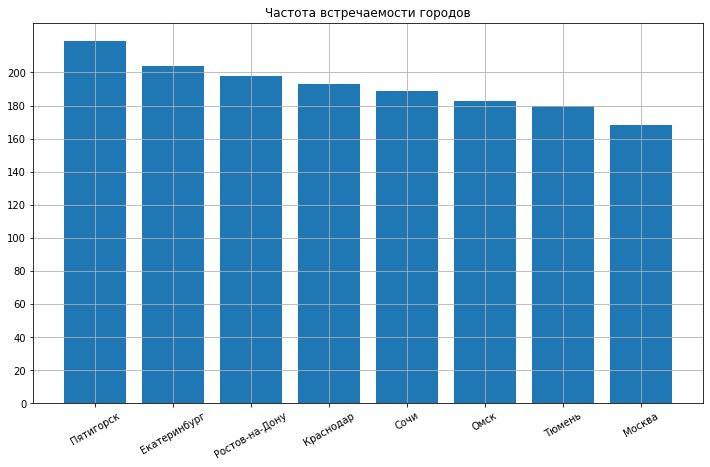

In [18]:
#визуализируем общую информацию о частоте встречаемости городов

city_counts = users['city'].value_counts()
cities = city_counts.index
counts = city_counts.values
plt.figure(figsize=(12,7))
plt.bar(cities, counts)
plt.xticks(rotation=30)
plt.title('Частота встречаемости городов')
plt.grid(True)
plt.yticks(range(0, max(counts)+1, 20))

plt.show()

</font><font color='Blue'><b>На графике видно, что больше всего пользователей в Пятигорске, а меньше всего в Москве </b></font><br>

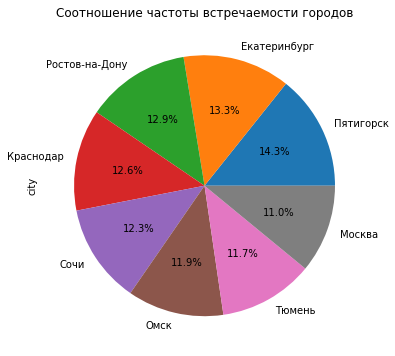

In [19]:
#визуализируем общую информацию о cоотношении частоты встречаемости городов

city_counts = users['city'].value_counts().plot(kind='pie',
                                                figsize=(12,6),
                                                autopct='%1.1f%%',
                                                title='Соотношение частоты встречаемости городов')

In [20]:
users['subscription_type'].value_counts()

free     835
ultra    699
Name: subscription_type, dtype: int64

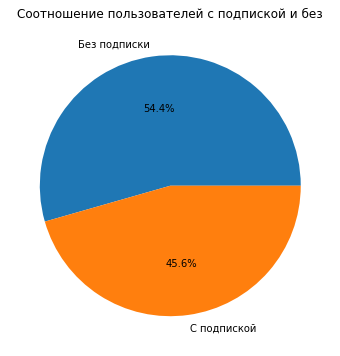

In [21]:
#визуализируем общую информацию о соотношении пользователей с подпиской и без подписки

subscription_type_counts = users['subscription_type'].value_counts()
labels=['Без подписки', 'С подпиской']

counts = subscription_type_counts.values
plt.figure(figsize=(12,6))
plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.title('Соотношение пользователей с подпиской и без')

plt.show()

</font><font color='Blue'><b>На графике видно, что пользователей без подписки немного меньше, чем пользователей с подпиской </b></font><br>

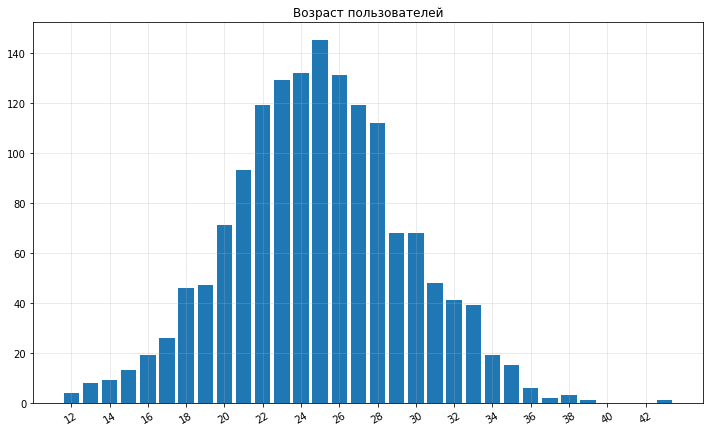

In [22]:
#визуализируем общую информацию о возрасте пользователей

age_counts = users['age'].value_counts()
ages = age_counts.index
counts = age_counts.values
plt.figure(figsize=(12,7))
plt.bar(ages, counts)
plt.xticks(rotation=30)
plt.title('Возраст пользователей')
plt.grid(True, alpha=0.3)
plt.xticks(range(12,43,2))
plt.yticks(range(0, max(counts)+1, 20))

plt.show()

</font><font color='Blue'><b>Больше всего пользователей самокатов в возрасте от 22 до 28, а "пик" мы можем наблюдать у пользователей, кому 25 лет </b></font><br>

In [23]:
rides['distance'].max()

7211.007744598519

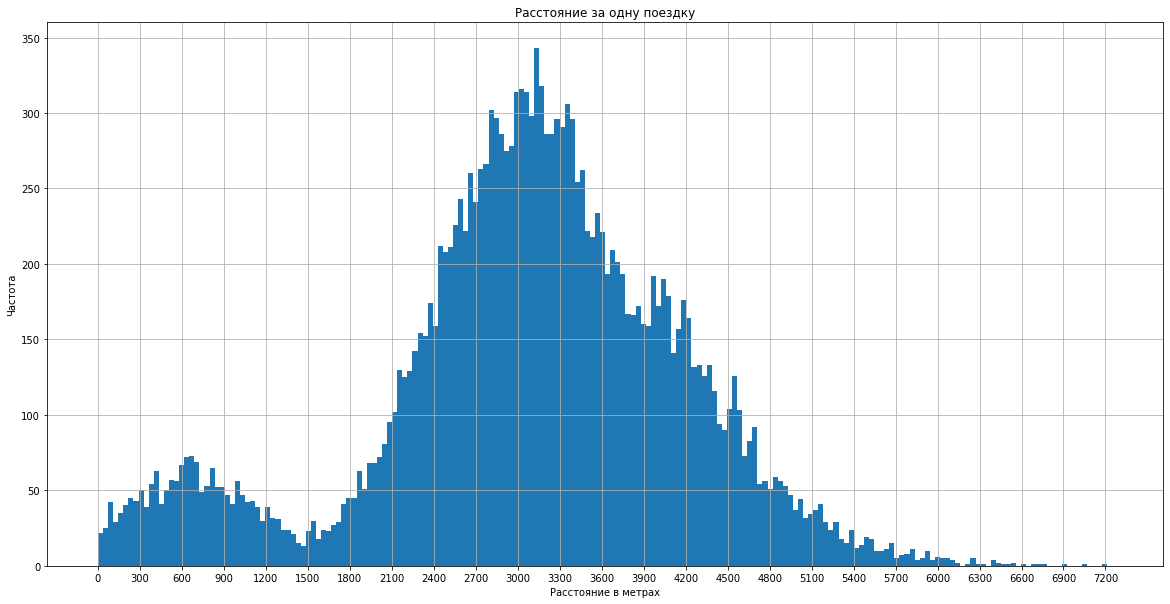

In [24]:
#визуализируем общую информацию о расстоянии, которое пользователь преодолел за одну поездку


distance_counts = rides['distance'].hist(bins=200, range=(0,7250), figsize=(20,10))
distance_counts.set_xlabel('Расстояние в метрах')
distance_counts.set_ylabel('Частота')
distance_counts.set_xticks(range(0,7250,300))
distance_counts.set_title('Расстояние за одну поездку');

</font><font color='Blue'><b>По графику и по коду видно, что самое большое расстояние, которое проезжали самокатом - чуть больше 7.2 км! Но обычно ездят около 3 км, то есть 3000 метров</b></font><br>

In [25]:
print(rides['duration'].min())
rides['duration'].max()

0.5


40.82396261922424

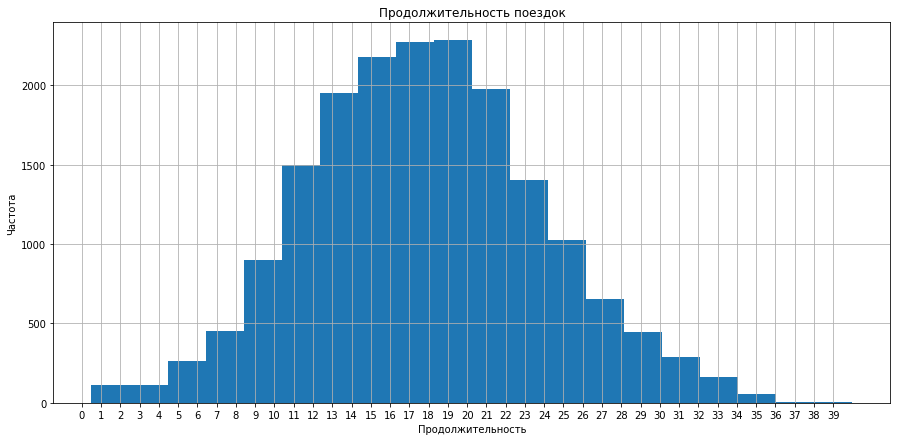

In [26]:
#визуализируем общую информацию о продолжительности поездок
rides['duration'].value_counts()

duration_counts = rides['duration'].hist(bins=20, range=(0.5,40), figsize=(15,7))
duration_counts.set_xlabel('Продолжительность')
duration_counts.set_ylabel('Частота')
duration_counts.set_xticks(range(0,40,1))
duration_counts.set_title('Продолжительность поездок');

In [27]:
rides['duration'].mean()

17.80501119798444

</font><font color='Blue'><b>По графику и по коду видно, в среднем продолжительность поездки на самокате равняется 17 минутам. Зная, что, в среднем люди ездят 3000 метров и 17 минут по продолжительности, то можно высчитать примерную среднюю скорость, с которой они ездят - это около 176 м/мин, что значит 10 км/ч

В ПДД прописаны ограничения для скорости самокатов — не более 25 км/ч</b></font><br>

# Шаг 4. Объединение данных

In [28]:
#объединяю все изначальные таблицы
df = users.merge(rides, on='user_id')

In [29]:
df = df.merge(subscriptions, on='subscription_type')

In [30]:
df

,user_id,name,age,city,subscription_type,distance,duration,date,month,year,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,2021,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,2021,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,2021,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,2021,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,2021,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,2021,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,2021,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,2021,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,2021,8,50,0


In [31]:
#создаю отдельно датафрейм c данными о пользователях без подписки

free = df[df['subscription_type'] == 'free'].copy()
free

,user_id,name,age,city,subscription_type,distance,duration,date,month,year,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,2021,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,2021,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,2021,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,2021,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,2021,8,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,2021,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,2021,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,2021,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,2021,8,50,0


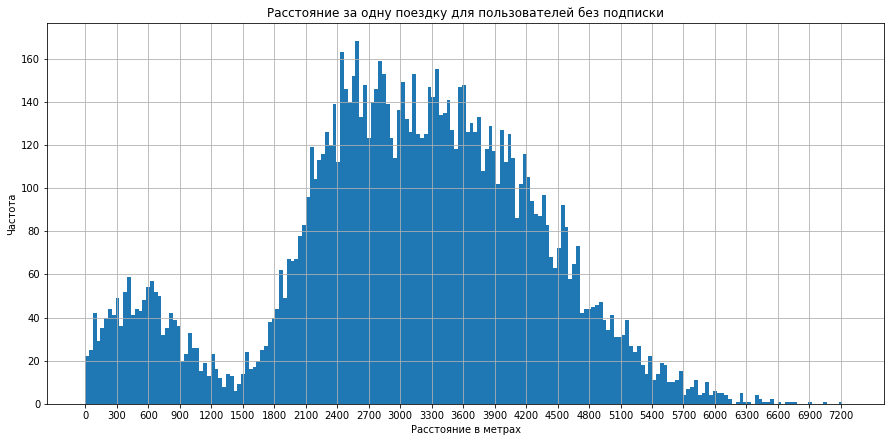

In [32]:
#визуализируем информацию о расстоянии за одну поездку для пользователей без подписки

distance_counts = free['distance'].hist(bins=200, range=(0,7250), figsize=(15,7))
distance_counts.set_xlabel('Расстояние в метрах')
distance_counts.set_ylabel('Частота')
distance_counts.set_xticks(range(0,7250,300))
distance_counts.set_title('Расстояние за одну поездку для пользователей без подписки');

<div style="background-color:lavender; color:#black; text-align:center; padding:2%">
    
**Виктория:** ✔️ По графику видно, что с бесплатным тарифом пользователи проезжают от 2 до 4.5 км, есть пользователи, которые проехали даже более 6.5км

In [33]:
free['duration'].max()

34.948498234556965

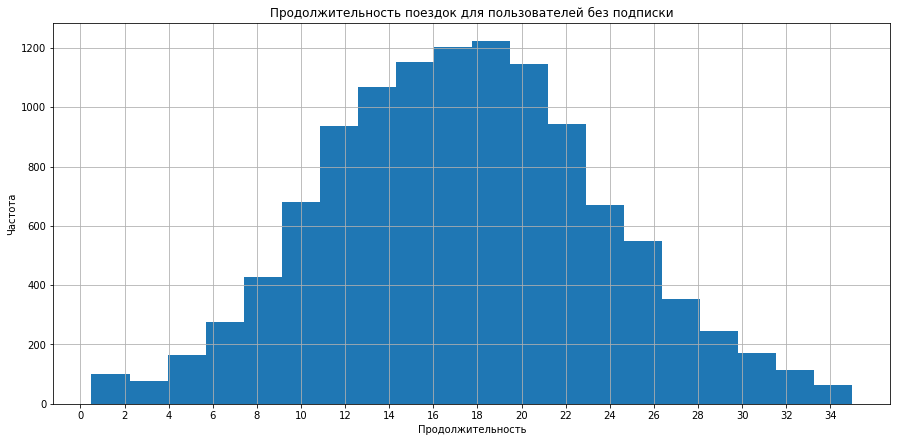

In [34]:
#визуализируем информацию о продолжительности поездок для пользователей без подписки

free['duration'].value_counts()

duration_counts = free['duration'].hist(bins=20, range=(0.5,35), figsize=(15,7))
duration_counts.set_xlabel('Продолжительность')
duration_counts.set_ylabel('Частота')
duration_counts.set_xticks(range(0,35,2))
duration_counts.set_title('Продолжительность поездок для пользователей без подписки');

<div style="background-color:lavender; color:#black; text-align:center; padding:2%">
    
**Виктория:** ✔️ По графику видно, что с бесплатным тарифом время поездки пользователей составляет от 10 до 25 минут

In [35]:
#создаю отдельно датафрейм  данными о пользователях с подпиской

ultra = df[df['subscription_type'] == 'ultra'].copy()
ultra

,user_id,name,age,city,subscription_type,distance,duration,date,month,year,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,2021,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,2021,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,2021,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,2021,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,2021,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6495,699,Оксана,22,Москва,ultra,3973.046497,24.671163,2021-08-29,8,2021,6,0,199
6496,699,Оксана,22,Москва,ultra,3288.702563,15.892886,2021-09-12,9,2021,6,0,199
6497,699,Оксана,22,Москва,ultra,3076.159348,14.389525,2021-09-26,9,2021,6,0,199
6498,699,Оксана,22,Москва,ultra,4707.845501,15.839579,2021-10-17,10,2021,6,0,199


In [36]:
ultra['distance'].max()

5699.769662039453

In [37]:
ultra['distance'].min()

244.21043833522924

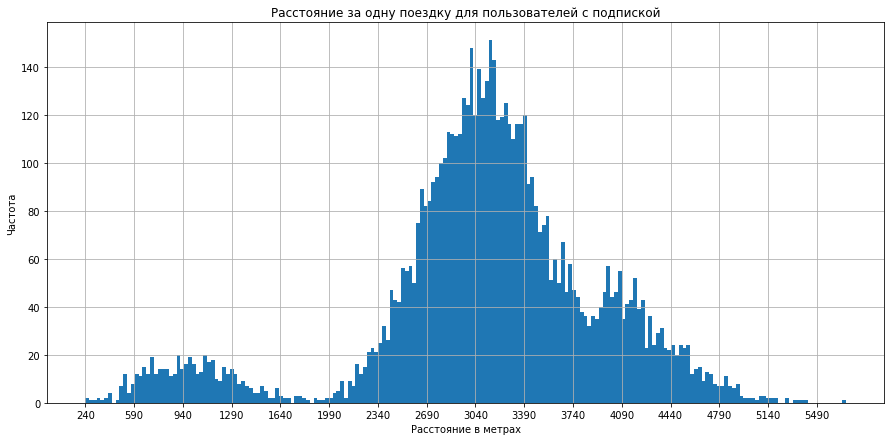

In [38]:
#визуализируем информацию о расстоянии за одну поездку для пользователей c подпиской

distance_counts = ultra['distance'].hist(bins=200, range=(240,5700), figsize=(15,7))
distance_counts.set_xlabel('Расстояние в метрах')
distance_counts.set_ylabel('Частота')
distance_counts.set_xticks(range(240,5700,350))
distance_counts.set_title('Расстояние за одну поездку для пользователей c подпиской');

<div style="background-color:lavender; color:#black; text-align:center; padding:2%">

**Виктория:** ✔️ По графику видно, что для пользователей с подпиской пик расстояния за одну поездку приходится на около 3 км, но также есть люди, которые ездят более 5 км

In [39]:
ultra['duration'].min()

3.760352854281739

In [40]:
ultra['duration'].max()

40.82396261922424

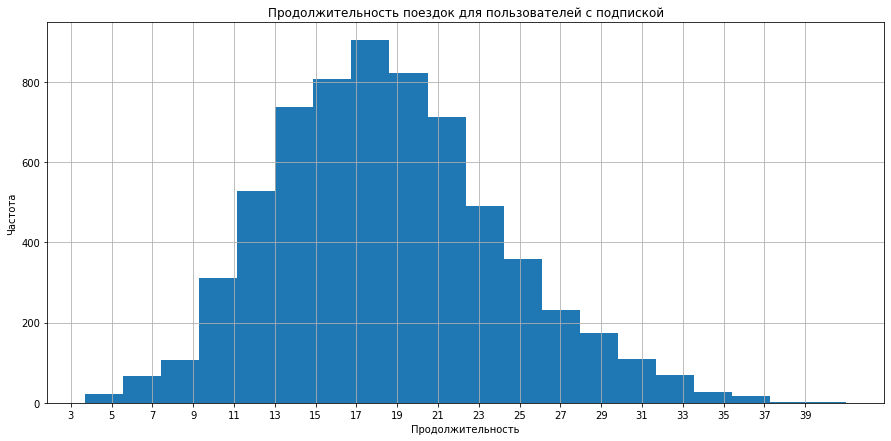

In [41]:
#визуализируем информацию о продолжительности поездок для пользователей c подпиской

ultra['duration'].value_counts()

duration_counts = ultra['duration'].hist(bins=20, range=(3.7,41), figsize=(15,7))
duration_counts.set_xlabel('Продолжительность')
duration_counts.set_ylabel('Частота')
duration_counts.set_xticks(range(3,41,2))
duration_counts.set_title('Продолжительность поездок для пользователей c подпиской');

<div style="background-color:lavender; color:#black; text-align:center; padding:2%">
    
**Виктория:** ✔️ По графику видно, что для пользователей с подпиской продолжительность поездки ориентировочно составляет от 13 до 23 минут, хотя есть и те люди, что катаются более получаса

# Шаг 5. Подсчёт выручки

In [42]:
df.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,year,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,2021,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,2021,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,2021,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,2021,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,2021,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,2021,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,2021,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,2021,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,2021,8,50,0


In [44]:
#создаём таблицу со значениями: суммарное расстояние, суммарное время, вид подписки и кол-во поездок

aggregated_df = df.pivot_table(index=['month', 'user_id'],
                            values=['distance', 'duration',
                                    'subscription_type'],
                            aggfunc={'user_id':'count',
                                     'distance':'sum',
                                     'duration':'sum',
                                     'subscription_type':'min'})

In [45]:
aggregated_df.rename(columns={'user_id':'count_trips'}, inplace=True)
aggregated_df['duration'] = np.ceil(aggregated_df['duration'])
aggregated_df

distance  duration subscription_type  count_trips
month user_id                                                      
1     1        7027.511294      42.0             ultra            2
      3        3061.777147      13.0             ultra            1
      5        3914.646990      13.0             ultra            1
      7        6478.080979      28.0             ultra            2
      12       3577.151148      33.0             ultra            1
...                    ...       ...               ...          ...
12    1525     4597.854350      34.0              free            1
      1526     3644.121544      23.0              free            1
      1528     3998.569324      11.0              free            1
      1532     6111.889853      41.0              free            2
      1534     2371.711192      16.0              free            1

[11331 rows x 4 columns]

In [46]:
def monthly_revenue(row):
    if row['subscription_type'] == 'free':
        return (50 * row['count_trips']) + (8 * row['duration'])
    elif row['subscription_type'] == 'ultra':
        return (6 * row['duration']) + 199

aggregated_df['monthly_revenue'] = aggregated_df.apply(monthly_revenue, axis=1)
aggregated_df

distance  duration subscription_type  count_trips  \
month user_id                                                         
1     1        7027.511294      42.0             ultra            2   
      3        3061.777147      13.0             ultra            1   
      5        3914.646990      13.0             ultra            1   
      7        6478.080979      28.0             ultra            2   
      12       3577.151148      33.0             ultra            1   
...                    ...       ...               ...          ...   
12    1525     4597.854350      34.0              free            1   
      1526     3644.121544      23.0              free            1   
      1528     3998.569324      11.0              free            1   
      1532     6111.889853      41.0              free            2   
      1534     2371.711192      16.0              free            1   

               monthly_revenue  
month user_id                   
1     1                  451.0  
      3                  277.0  
      5                  277.0  
      7                  367.0  
      12                 397.0  
...                        ...  
12    1525               322.0  
      1526               234.0  
      1528               138.0  
      1532               428.0  
      1534               178.0  

[11331 rows x 5 columns]

</font><font color='Blue'><b>Были вычислены суммарное расстояние, количество поездок и суммарное время для каждого пользователя в течение каждого месяца. Кроме того, добавлен столбец с помесячной выручкой, полученной от каждого пользователя</b></font><br>

#### Шаг 6. Проверка гипотез

<div style="background-color:lavender; color:#black; text-align:center; padding:2%">
    
**Виктория:** ✔️ 

H0 (нулевая гипотеза): Время 'duration' пользователей с подпиской 'ultra' = время 'duration'  пользователей без подписки 'free'

    
H1 (альтернативная гипотеза): Время 'duration'  пользователей с подпиской 'ultra' > время 'duration'  пользователей без подписки 'free'

In [47]:
#проверяем, тратят ли пользователи с подпиской больше времени на поездки

ultra_subscription = ultra['duration']
free_subscription = free['duration']
alpha = 0.05

results = st.ttest_ind(ultra_subscription, free_subscription, alternative='greater')

print(f'p-value: {results.pvalue}')
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 1.2804098316645618e-34
Отвергаем нулевую гипотезу


In [52]:
ultra_subscription = ultra['duration']
ultra_subscription

0       25.599769
1       15.816871
2        6.232113
3       18.511000
4       26.265803
          ...    
6495    24.671163
6496    15.892886
6497    14.389525
6498    15.839579
6499    25.217345
Name: duration, Length: 6500, dtype: float64

</font><font color='Blue'><b>Можно сделать вывод о том, что пользователи с подпиской не тратят столько времени на поездки, сколько и пользователи на бесплатном тарифе</b></font><br>

<div style="background-color:lavender; color:#black; text-align:center; padding:2%">
    
**Виктория:** ✔️ 

H0 (нулевая гипотеза): Расстояние 'distance' пользователей с подпиской 'ultra' = 3130 м

    
H1 (альтернативная гипотеза): Расстояние 'distance' пользователей с подпиской 'ultra' < 3130 м

In [48]:
#проверка гипотезы: расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров

distance_per_trip = ultra['distance']
interested_value = 3130
alpha = 0.05
results = st.ttest_1samp(distance_per_trip, interested_value, alternative='less')

print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергать нулевую гипотезу')

p-value: 0.08046311521502146
Нет оснований отвергать нулевую гипотезу


</font><font color='Blue'><b>Можно сделать вывод о том, что мы не можем утверждать, что расстояние, которое проехали пользователи на тарифе ultra не превышает 3130 м</b></font><br>

In [49]:
aggregated_df.head()

distance  duration subscription_type  count_trips  \
month user_id                                                         
1     1        7027.511294      42.0             ultra            2   
      3        3061.777147      13.0             ultra            1   
      5        3914.646990      13.0             ultra            1   
      7        6478.080979      28.0             ultra            2   
      12       3577.151148      33.0             ultra            1   
...                    ...       ...               ...          ...   
12    1525     4597.854350      34.0              free            1   
      1526     3644.121544      23.0              free            1   
      1528     3998.569324      11.0              free            1   
      1532     6111.889853      41.0              free            2   
      1534     2371.711192      16.0              free            1   

               monthly_revenue  
month user_id                   
1     1                  451.0  
      3                  277.0  
      5                  277.0  
      7                  367.0  
      12                 397.0  
...                        ...  
12    1525               322.0  
      1526               234.0  
      1528               138.0  
      1532               428.0  
      1534               178.0  

[11331 rows x 5 columns]

<div style="background-color:lavender; color:#black; text-align:center; padding:2%">
    
**Виктория:** ✔️ 

H0 (нулевая гипотеза): Выручка 'monthly_revenue' пользователей с подпиской 'ultra' = выручка 'monthly_revenue' пользователей без подписки 'free'

    
H1 (альтернативная гипотеза): Выручка 'monthly_revenue' пользователей с подпиской 'ultra' > выручка 'monthly_revenue' пользователей без подписки 'free'

In [50]:
#проверяем, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки

monthly_revenue_ultra = aggregated_df.loc[aggregated_df['subscription_type'] == 'ultra', 'monthly_revenue']                                          
monthly_revenue_free = aggregated_df.loc[aggregated_df['subscription_type'] == 'free', 'monthly_revenue']

alpha = 0.05

results = st.ttest_ind(monthly_revenue_ultra, monthly_revenue_free, alternative='greater')

print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергать нулевую гипотезу')

p-value: 2.8130926188487286e-35
Отвергаем нулевую гипотезу


</font><font color='Blue'><b>Можно сделать вывод о том, что выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки</b></font><br>

6.4. Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

</font><font color='Blue'><b>Нужно использовать scipy.stats.ttest_rel()

Гипотезы будут сформулированы так:


H0 : μ1 = μ2

H1 : μ1 != μ2

где μ1 и μ2 - средние значения до и после изменения.</b></font><br>

#### Шаг 7. Распределения

</font><font color='Blue'><b>
    
Общий вывод: Был проведен анализ данных, где были рассчитаны общее расстояние, количество поездок и общее время для каждого клиента в течение каждого месяца. Кроме того, был добавлен столбец с месячным доходом от каждого клиента.

В процессе анализа были загружены 3 таблицы: с информацией о клиентах, о поездках и о подписках. Была проверена наличие пропущенных значений в данных, но таких значений не было обнаружено.

В результате исследовательского анализа были получены следующие результаты:

- Наибольшее количество клиентов зарегистрировано в Пятигорске, а наименьшее количество в Москве.
- Большинство клиентов используют бесплатную подписку.
- Возраст клиентов варьируется от 20 до 30 лет.
- Наиболее распространенные расстояния поездок составляют от 2.5 до 4 км.
- Чаще всего поездки длительностью от 13 до 22 минут.

Также были найдены общее расстояние, количество поездок и общее время для каждого клиента за каждый месяц.

В ходе проверки гипотез были получены следующие результаты:

- Клиенты с подпиской тратят больше времени на поездки, чем клиенты без подписки. Эта гипотеза была отвергнута.
- Клиенты с подпиской не превышают расстояние в 3130 метров за одну поездку. Эта гипотеза не была отвергнута.
- Месячный доход от клиентов с подпиской выше, чем от клиентов без подписки. Эта гипотеза была отвергнута.
    
</b></font><br>